# Experiment 5: Part 2: AO* Algorithm
- Name: **Anas Muhammmed Sahil**
- Date: 14-02-2025
- Roll Number: 20242AIE0010

Updated Cost:


D : {'OR': ['J']} >>> {'J': 1}
C : {'OR': ['G'], 'AND': ['H', 'I']} >>> {'H AND I': 2, 'G': 4}
B : {'OR': ['E', 'F']} >>> {'E OR F': 8}
A : {'OR': ['B'], 'AND': ['C', 'D']} >>> {'C AND D': 5, 'B': 9}
Shortest Path:

 A=(C AND D) [C=(H AND I) [H + I] + D = J]


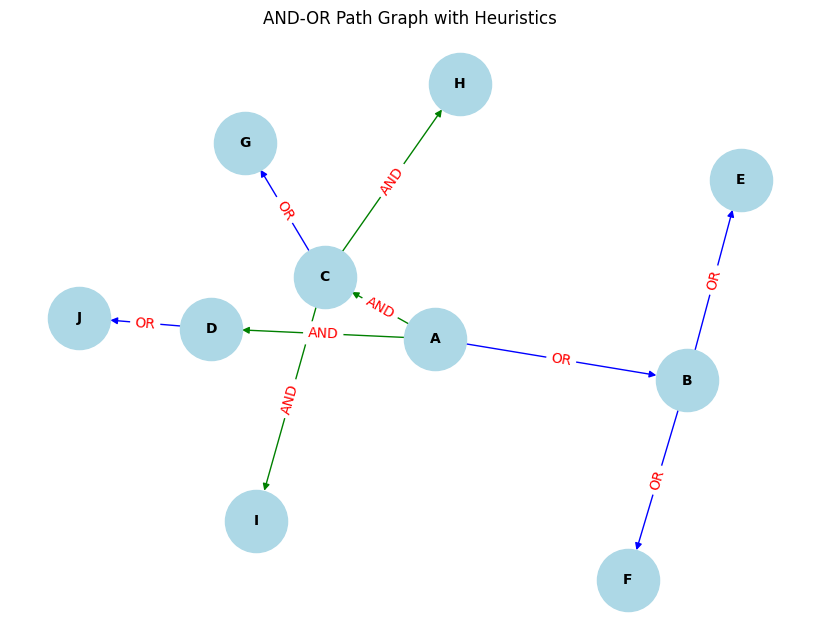

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Cost to find the AND and OR path
def Cost(H, condition, weight=1):
    cost = {}
    if 'AND' in condition:
        AND_nodes = condition['AND']
        Path_A = ' AND '.join(AND_nodes)
        PathA = sum(H[node] + weight for node in AND_nodes)
        cost[Path_A] = PathA

    if 'OR' in condition:
        OR_nodes = condition['OR']
        Path_B = ' OR '.join(OR_nodes)
        PathB = min(H[node] + weight for node in OR_nodes)
        cost[Path_B] = PathB
    return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
    Main_nodes = list(Conditions.keys())
    Main_nodes.reverse()
    least_cost = {}
    for key in Main_nodes:
        condition = Conditions[key]
        print(key, ':', Conditions[key], '>>>', Cost(H, condition, weight))
        c = Cost(H, condition, weight)
        H[key] = min(c.values())
        least_cost[key] = Cost(H, condition, weight)
    return least_cost

# Print the shortest path
def shortest_path(Start, Updated_cost, H):
    Path = Start
    if Start in Updated_cost.keys():
        Min_cost = min(Updated_cost[Start].values())
        key = list(Updated_cost[Start].keys())
        values = list(Updated_cost[Start].values())
        Index = values.index(Min_cost)

        # FIND MINIMUM PATH KEY
        Next = key[Index].split()
        # ADD TO PATH FOR OR PATH
        if len(Next) == 1:
            Start = Next[0]
            Path += ' = ' + shortest_path(Start, Updated_cost, H)
        # ADD TO PATH FOR AND PATH
        else:
            Path += '=('+key[Index]+') '
            Start = Next[0]
            Path += '[' + shortest_path(Start, Updated_cost, H) + ' + '
            Start = Next[-1]
            Path += shortest_path(Start, Updated_cost, H) + ']'

    return Path

# Visualization of the graph based on the provided conditions
def visualize_graph(conditions, updated_cost, H):
    G = nx.DiGraph()

    # Add nodes and edges
    for node, condition in conditions.items():
        if 'AND' in condition:
            for n in condition['AND']:
                G.add_edge(node, n, label='AND', color='green')
        if 'OR' in condition:
            for n in condition['OR']:
                G.add_edge(node, n, label='OR', color='blue')

    pos = nx.spring_layout(G)  # positions for all nodes
    labels = nx.get_edge_attributes(G, 'label')
    colors = [G[u][v]['color'] for u, v in G.edges]

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', edge_color=colors, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title('AND-OR Path Graph with Heuristics')
    plt.show()

# Example graphs:

# Heuristic and graph values (set 1)
H = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}

Conditions = {
 'A': {'OR': ['D'], 'AND': ['B', 'C']},
 'B': {'OR': ['G', 'H']},
 'C': {'OR': ['J']},
 'D': {'AND': ['E', 'F']},
 'G': {'OR': ['I']}
}

# Heuristic and graph values (set 2)
H_2 = {'A': -1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}

Conditions_2 = {
    'A': {'OR': ['B'], 'AND': ['C', 'D']},
    'B': {'OR': ['E', 'F']},
    'C': {'OR': ['G'], 'AND': ['H', 'I']},
    'D': {'OR': ['J']}
}

print('Updated Cost:\n\n')
Updated_cost = update_cost(H_2, Conditions_2, weight=1)
print('Shortest Path:\n\n', shortest_path('A', Updated_cost, H_2))
visualize_graph(Conditions_2, Updated_cost, H_2)
